# 1.  Load Library and Dataset

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime 
# Dates
import matplotlib.dates as mdates

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
transaction = pd.read_csv("QVI_data.csv")
transaction.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [3]:
transaction["YEAR_MONTH"] = pd.to_datetime(transaction['DATE']).dt.to_period('M')
transaction.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,YEAR_MONTH
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,2018-10
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,2018-09
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,2019-03
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,2019-03
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,2018-11


Text(0.5, 1.0, 'Monthly Total Salse by store ID')

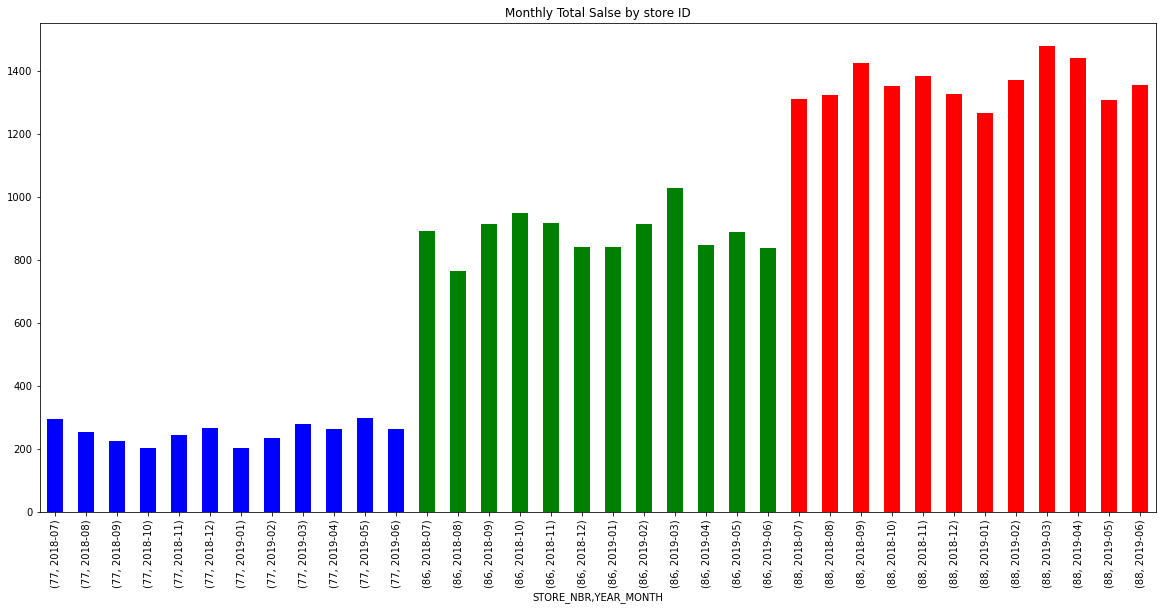

In [4]:
stores = transaction[transaction['STORE_NBR'].isin([77,86,88])].groupby(['STORE_NBR', 'YEAR_MONTH'])['TOT_SALES'].sum()
colors = []
for store, month in stores.index:
    if store == 77:
        colors.append('blue')
    elif store == 86:
        colors.append('green')
    else:
        colors.append('red')
stores.plot(kind='bar', color = colors, figsize = (20,9))
plt.title("Monthly Total Salse by store ID")

Text(0.5, 1.0, 'Monthly Total Customers by store ID')

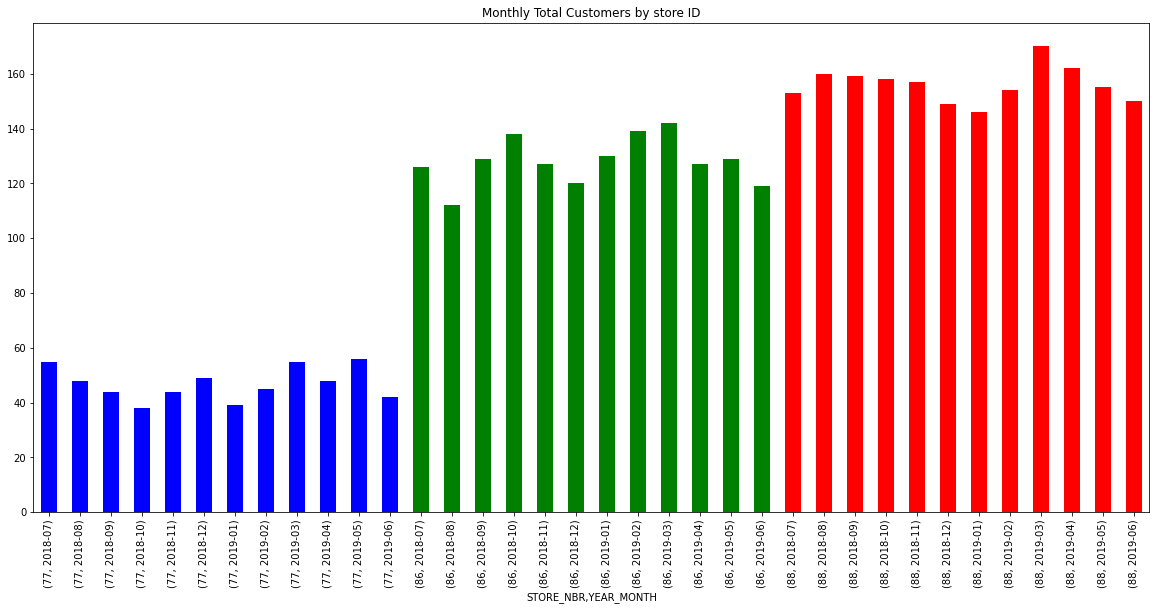

In [5]:
customers = transaction[transaction['STORE_NBR'].isin([77,86,88])].groupby(['STORE_NBR', 'YEAR_MONTH'])['LYLTY_CARD_NBR'].count()
colors = []
for store, month in customers.index:
    if store == 77:
        colors.append('blue')
    elif store == 86:
        colors.append('green')
    else:
        colors.append('red')
customers.plot(kind='bar', color = colors, figsize = (20,9))
plt.title("Monthly Total Customers by store ID")

Create a new dataframe for each store montly metrics below:
- Total Sales
- Number of Customer
- Average transaction per customer
- Average chips per customer
- Average price per unit (每包薯片的单价)

In [6]:
month_measures = transaction.groupby(['STORE_NBR','YEAR_MONTH'])
total = month_measures['TOT_SALES'].sum()
num_cust = month_measures['LYLTY_CARD_NBR'].nunique()
trans_per_cust = month_measures.size()/num_cust
avg_chips_per_cust = month_measures['PROD_QTY'].sum()/num_cust
avg_chips_price = total/month_measures['PROD_QTY'].sum()
columns = [total,num_cust,trans_per_cust, avg_chips_per_cust, avg_chips_price]
store_measures = pd.concat(columns,axis = 1)
store_measures.columns = ['MONTHLY_SALES', 'MONTHLY_CUST','MONTHLY_TRANS_PER_CUST',
                          'MONTHLY_CHIPS_PER_TRANS','AVG_PRICE_PER_UNIT']
store_measures.head()

MONTHLY_SALES  MONTHLY_CUST  MONTHLY_TRANS_PER_CUST  \
STORE_NBR YEAR_MONTH                                                        
1         2018-07             206.9            49                1.061224   
          2018-08             176.1            42                1.023810   
          2018-09             278.8            59                1.050847   
          2018-10             188.1            44                1.022727   
          2018-11             192.6            46                1.021739   

                      MONTHLY_CHIPS_PER_TRANS  AVG_PRICE_PER_UNIT  
STORE_NBR YEAR_MONTH                                               
1         2018-07                    1.265306            3.337097  
          2018-08                    1.285714            3.261111  
          2018-09                    1.271186            3.717333  
          2018-10                    1.318182            3.243103  
          2018-11                    1.239130            3.378947

In [7]:
store_measures.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3169 entries, (1, Period('2018-07', 'M')) to (272, Period('2019-06', 'M'))
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   MONTHLY_SALES            3169 non-null   float64
 1   MONTHLY_CUST             3169 non-null   int64  
 2   MONTHLY_TRANS_PER_CUST   3169 non-null   float64
 3   MONTHLY_CHIPS_PER_TRANS  3169 non-null   float64
 4   AVG_PRICE_PER_UNIT       3169 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 135.4 KB


In [8]:
# Filter to the pre‐trial period and stores with full observation periods
# delete the stores with less than 12 month transaction
store_measures=store_measures.reset_index()
check = store_measures['STORE_NBR'].value_counts()
check = check[check!=12]
stores_with_less_than_12_months = check.index.to_list() # lst of store num need to be dropped
print(f"store number with less than 12 months: {stores_with_less_than_12_months}")
print(f"before deletion: {len(store_measures.index)}")
print(f"deleted {len(stores_with_less_than_12_months)} records")
store_measures = store_measures[~store_measures['STORE_NBR'].isin(stores_with_less_than_12_months)]
print(f"after deletion: {len(store_measures.index)}")

store number with less than 12 months: [117, 44, 218, 193, 211, 252, 31, 206, 11, 92, 85, 76]
before deletion: 3169
deleted 12 records
after deletion: 3120


In [9]:
pre_trial = store_measures[store_measures['YEAR_MONTH']<"2019-02"]
pre_trial.head()

,STORE_NBR,YEAR_MONTH,MONTHLY_SALES,MONTHLY_CUST,MONTHLY_TRANS_PER_CUST,MONTHLY_CHIPS_PER_TRANS,AVG_PRICE_PER_UNIT
0,1,2018-07,206.9,49,1.061224,1.265306,3.337097
1,1,2018-08,176.1,42,1.023810,1.285714,3.261111
2,1,2018-09,278.8,59,1.050847,1.271186,3.717333
3,1,2018-10,188.1,44,1.022727,1.318182,3.243103
4,1,2018-11,192.6,46,1.021739,1.239130,3.378947


In [10]:
def extract_metrics(df):
    subdf = df.loc[:].set_index(['STORE_NBR','YEAR_MONTH']).sort_values(by=['STORE_NBR','YEAR_MONTH'])
    subdf.drop_duplicates(inplace=True, keep='first')
    return subdf
metrics_df = extract_metrics(pre_trial)
metrics_df

MONTHLY_SALES  MONTHLY_CUST  MONTHLY_TRANS_PER_CUST  \
STORE_NBR YEAR_MONTH                                                        
1         2018-07             206.9            49                1.061224   
          2018-08             176.1            42                1.023810   
          2018-09             278.8            59                1.050847   
          2018-10             188.1            44                1.022727   
          2018-11             192.6            46                1.021739   
...                             ...           ...                     ...   
272       2018-09             304.7            32                1.125000   
          2018-10             430.6            44                1.159091   
          2018-11             376.2            41                1.097561   
          2018-12             403.9            47                1.000000   
          2019-01             423.0            46                1.086957   

                      MONTHLY_CHIPS_PER_TRANS  AVG_PRICE_PER_UNIT  
STORE_NBR YEAR_MONTH                                               
1         2018-07                    1.265306            3.337097  
          2018-08                    1.285714            3.261111  
          2018-09                    1.271186            3.717333  
          2018-10                    1.318182            3.243103  
          2018-11                    1.239130            3.378947  
...                                       ...                 ...  
272       2018-09                    2.218750            4.291549  
          2018-10                    2.250000            4.349495  
          2018-11                    2.121951            4.324138  
          2018-12                    1.893617            4.538202  
          2019-01                    2.086957            4.406250  

[1818 rows x 5 columns]

In [11]:
# find correlation between trial stores and control stores one by one.
# and caclulate the average of the correlation for each metric as a composite score to rank on
def calc_correlation(trial_store):
    '''
    parameter: it takes one trial store_num to compare other stores with
    output: new dataframe with correlation and mean correlation
    '''
    a = []
    metrics = metrics_df[['MONTHLY_SALES','MONTHLY_CUST']]
    for i in metrics.index:
        a.append(metrics.loc[trial_store].corrwith(metrics.loc[i[0]])) #loc[i[0]]是store id
#     对应到store 77所有store和他的correlation
    subdf = pd.DataFrame(a)
    subdf.head()
    subdf.index = metrics.index
    subdf = subdf.drop_duplicates()
    subdf.index = [s[0] for s in subdf.index]
    subdf = subdf.abs()
    # and caclulate the average of the correlation for each metric 
#     as a composite score to rank on
    subdf['mean_corr'] = subdf.mean(axis = 1)
    subdf['TRIAL_STR'] = trial_store
    subdf.sort_values(by='mean_corr', ascending = False, inplace=True)
    return subdf

In [12]:
trial_stores = [77,86,88]
for store in trial_stores:
    corr_df = calc_correlation(store).drop(store)
    display(corr_df.head())

,MONTHLY_SALES,MONTHLY_CUST,mean_corr,TRIAL_STR
233,0.903774,0.990358,0.947066,77
119,0.867664,0.983267,0.925466,77
71,0.914106,0.754817,0.834461,77
3,0.806644,0.834207,0.820426,77
41,0.783232,0.844219,0.813726,77


,MONTHLY_SALES,MONTHLY_CUST,mean_corr,TRIAL_STR
155,0.877882,0.942876,0.910379,86
23,0.784698,0.943559,0.864128,86
120,0.872693,0.815097,0.843895,86
114,0.734415,0.855339,0.794877,86
260,0.720350,0.846502,0.783426,86


,MONTHLY_SALES,MONTHLY_CUST,mean_corr,TRIAL_STR
178,0.731857,0.939466,0.835661,88
14,0.698557,0.942976,0.820767,88
133,0.735407,0.835426,0.785417,88
204,0.885774,0.550263,0.718018,88
134,0.864293,0.508880,0.686587,88


Now that we have found the most related control store for each trial store, let's check visually if the drivers are indeed similar in the period before the trial. We'll look at total sales first

In [13]:
others = metrics_df.iloc[~metrics_df.index.get_level_values('STORE_NBR').isin([77,233])][['MONTHLY_SALES','MONTHLY_CUST']].reset_index()
others_sales = others.groupby(['YEAR_MONTH'])['MONTHLY_SALES'].mean()
other_cust = others.groupby(['YEAR_MONTH'])['MONTHLY_CUST'].mean()
other_cust

YEAR_MONTH
2018-07    72.333333
2018-08    72.120155
2018-09    70.131783
2018-10    71.608527
2018-11    70.801556
2018-12    73.785992
2019-01    71.240310
Freq: M, Name: MONTHLY_CUST, dtype: float64

In [14]:
def compare_corr(trial,control,title, metric, others):
    metrics_df.loc[trial][metric].plot(kind = 'line', color = 'g')
    metrics_df.loc[control][metric].plot(kind = 'line', color = 'r')
    others.plot(kind='line',color = 'b')
    plt.title(title)
    plt.legend(labels = (f'trial:{trial}', f'control:{control}','others'),loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.xticks(rotation=0)
    plt.show()

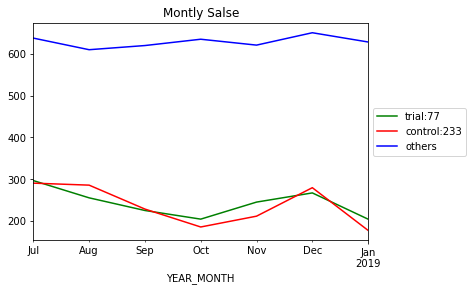

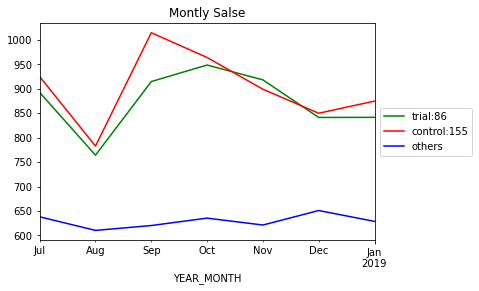

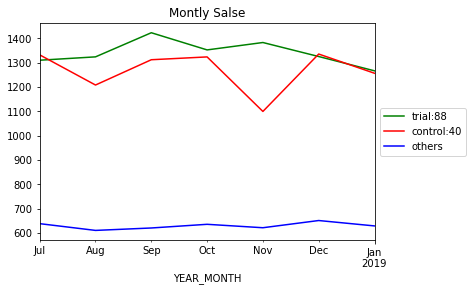

In [15]:
compare_corr(77,233,"Montly Salse",'MONTHLY_SALES',others_sales)
compare_corr(86,155,"Montly Salse",'MONTHLY_SALES',others_sales)
compare_corr(88,40,"Montly Salse",'MONTHLY_SALES',others_sales)

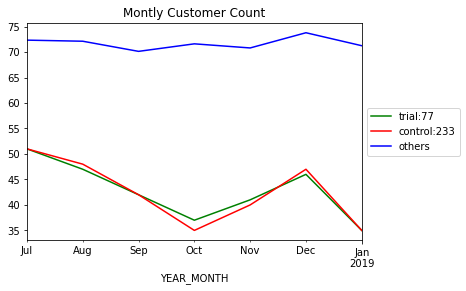

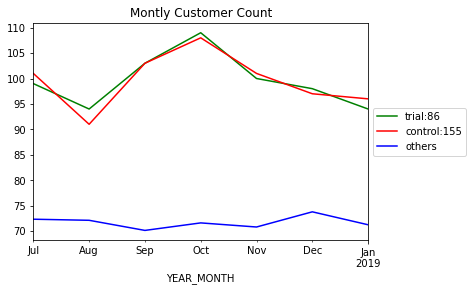

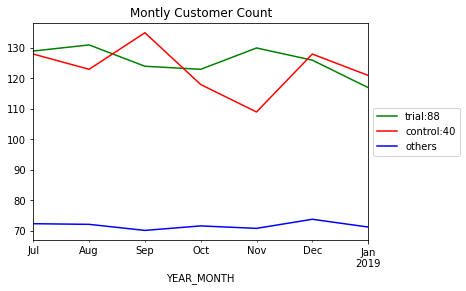

In [16]:
compare_corr(77,233,"Montly Customer Count",'MONTHLY_CUST',other_cust)
compare_corr(86,155,"Montly Customer Count",'MONTHLY_CUST',other_cust)
compare_corr(88,40,"Montly Customer Count",'MONTHLY_CUST',other_cust)

Even there is different for trial store and control store but they follow a similar trend.
- Null Hypothsis H0 = 0 difference between control store and trial store
- Alternative Hypotheis Ha = there is difference
- if the p-value < 5% then we can reject the H0, it is statistical significantly different
- if the p-value > 5% then we need to accept the H0, it is not statistical significantly different

In [17]:
from scipy.stats import ks_2samp,ttest_ind,t

In [18]:
def pvalue_calculation(trial, control):
    cols_under_consideration = ['MONTHLY_SALES', 'MONTHLY_CUST']
    a=[]
    for x in metrics_df[cols_under_consideration]:
        a.append(ks_2samp(metrics_df.loc[trial][x], metrics_df.loc[control][x]))
    print(f"Trial: {trial}; Control: {control}")
    a=pd.DataFrame(a, index = cols_under_consideration)
    display(a.head())

In [19]:
pvalue_calculation(77,233)
pvalue_calculation(86,155)
pvalue_calculation(88,40)

Trial: 77; Control: 233


,statistic,pvalue
MONTHLY_SALES,0.285714,0.962704
MONTHLY_CUST,0.142857,0.999961


Trial: 86; Control: 155


,statistic,pvalue
MONTHLY_SALES,0.285714,0.962704
MONTHLY_CUST,0.285714,0.962704


Trial: 88; Control: 40


,statistic,pvalue
MONTHLY_SALES,0.428571,0.575175
MONTHLY_CUST,0.285714,0.962704


For store number 77,86 and 88, the p-value for both monthly sales and monthly customer are a lot bigger than 5%, so there is not statistical significantly different.

### Assessment of Trial
The trial period goes from the start of March 2019 to June 2019. We now want to see if there has been an uplift in overall chip sales. We’ll start with scaling the control store’s sales to a level similar to control for any differences between the two stores outside of the trial period.
- We will compare the trial store with the control store in the trial period (Feb. 2019 to Apr. 2019)

Scale pre‐trial control sales to match pre‐trial trial store sales

In [21]:
# Ratio of store 77 and its control store
pre_sales_ratio_77=pre_trial[pre_trial['STORE_NBR']==77]['MONTHLY_SALES'].sum()/pre_trial[pre_trial['STORE_NBR']==233]['MONTHLY_SALES'].sum()
# Ratio of store 86 and its control store
pre_sales_ratio_86=pre_trial[pre_trial['STORE_NBR']==86]['MONTHLY_SALES'].sum()/pre_trial[pre_trial['STORE_NBR']==155]['MONTHLY_SALES'].sum()
# Ratio of store 88 and its control store
pre_sales_ratio_88=pre_trial[pre_trial['STORE_NBR']==88]['MONTHLY_SALES'].sum()/pre_trial[pre_trial['STORE_NBR']==40]['MONTHLY_SALES'].sum()
print(pre_sales_ratio_77,pre_sales_ratio_86,pre_sales_ratio_88 )

1.023617303289553 0.9700651481287746 1.0582848378219878


In [22]:
scaledControlSales = store_measures[store_measures['STORE_NBR']==233]
scaledControlSales['CONTROL_SALES']=scaledControlSales['MONTHLY_SALES']*pre_sales_ratio_77
scaledControlSales.head()

<ipython-input-22-1c2d98df7218>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaledControlSales['CONTROL_SALES']=scaledControlSales['MONTHLY_SALES']*pre_sales_ratio_77


,STORE_NBR,YEAR_MONTH,MONTHLY_SALES,MONTHLY_CUST,MONTHLY_TRANS_PER_CUST,MONTHLY_CHIPS_PER_TRANS,AVG_PRICE_PER_UNIT,CONTROL_SALES
2699,233,2018-07,290.7,51,1.058824,1.725490,3.303409,297.565550
2700,233,2018-08,285.9,48,1.041667,1.666667,3.573750,292.652187
2701,233,2018-09,228.6,42,1.071429,1.666667,3.265714,233.998916
2702,233,2018-10,185.7,35,1.028571,1.600000,3.316071,190.085733
2703,233,2018-11,211.6,40,1.025000,1.550000,3.412903,216.597421


Now that we have comparable sales figures for the control store, we can calculate the percentage difference between the scaled control sales and the trial store's sales during the trial period.

In [24]:
trialSales_77 = store_measures[store_measures["STORE_NBR"]== 77].reset_index(drop=True)
percentageDiff_77 = trialSales_77.merge(scaledControlSales[['YEAR_MONTH','CONTROL_SALES']], on='YEAR_MONTH')
percentageDiff_77['PERCENT_DIFF'] = (abs(percentageDiff_77['MONTHLY_SALES']-percentageDiff_77['CONTROL_SALES']))/percentageDiff_77['CONTROL_SALES']
percentageDiff_77

,STORE_NBR,YEAR_MONTH,MONTHLY_SALES,MONTHLY_CUST,MONTHLY_TRANS_PER_CUST,MONTHLY_CHIPS_PER_TRANS,AVG_PRICE_PER_UNIT,CONTROL_SALES,PERCENT_DIFF
0,77,2018-07,296.8,51,1.078431,1.647059,3.533333,297.565550,0.002573
1,77,2018-08,255.5,47,1.021277,1.574468,3.452703,292.652187,0.126950
2,77,2018-09,225.2,42,1.047619,1.666667,3.217143,233.998916,0.037602
3,77,2018-10,204.5,37,1.027027,1.405405,3.932692,190.085733,0.075830
4,77,2018-11,245.3,41,1.073171,1.634146,3.661194,216.597421,0.132516
5,77,2018-12,267.3,46,1.065217,1.565217,3.712500,286.408121,0.066716
6,77,2019-01,204.4,35,1.114286,1.857143,3.144615,181.692071,0.124980
7,77,2019-02,235.0,45,1.000000,1.644444,3.175676,249.762622,0.059107
8,77,2019-03,278.5,50,1.100000,1.640000,3.396341,203.802205,0.366521
9,77,2019-04,263.5,47,1.021277,1.659574,3.378205,162.345704,0.623080


Let's see if the difference is significant! As our null hypothesis is that the trial period is the same as the pre-trial period, let's take the standard deviation based on the scaled percentage difference in the pre-trial period

In [79]:
# There are 7 months (2018-07 to 2019-01) for the pre-trial period, the degree of freedom is 7-1 = 6
dof = 6
stdDev_77 = percentageDiff_77[percentageDiff_77['YEAR_MONTH']<'2019-02']['PERCENT_DIFF'].std()
stdDev_77

0.049940762641425544

We will test with a null hypothesis of there being 0 difference between trial and control stores.

In [80]:
percentageDiff_77['T_VALUE'] = (percentageDiff_77['PERCENT_DIFF']-0)/stdDev_77
percentageDiff_77

,STORE_NBR,YEAR_MONTH,MONTHLY_SALES,MONTHLY_CUST,MONTHLY_TRANS_PER_CUST,MONTHLY_CHIPS_PER_TRANS,AVG_PRICE_PER_UNIT,CONTROL_SALES,PERCENT_DIFF,5%_CONFIDENCE_INTERVAL,95%_CONFIDENCE_INTERVAL,T_VALUE
0,77,2018-07,296.8,51,1.078431,1.647059,3.533333,297.565550,0.002573,267.155163,326.444837,0.051515
1,77,2018-08,255.5,47,1.021277,1.574468,3.452703,292.652187,0.126950,229.980270,281.019730,2.542011
2,77,2018-09,225.2,42,1.047619,1.666667,3.217143,233.998916,0.037602,202.706681,247.693319,0.752940
3,77,2018-10,204.5,37,1.027027,1.405405,3.932692,190.085733,0.075830,184.074228,224.925772,1.518406
4,77,2018-11,245.3,41,1.073171,1.634146,3.661194,216.597421,0.132516,220.799062,269.800938,2.653459
5,77,2018-12,267.3,46,1.065217,1.565217,3.712500,286.408121,0.066716,240.601668,293.998332,1.335911
6,77,2019-01,204.4,35,1.114286,1.857143,3.144615,181.692071,0.124980,183.984216,224.815784,2.502571
7,77,2019-02,235.0,45,1.000000,1.644444,3.175676,249.762622,0.059107,211.527842,258.472158,1.183534
8,77,2019-03,278.5,50,1.100000,1.640000,3.396341,203.802205,0.366521,250.682995,306.317005,7.339116
9,77,2019-04,263.5,47,1.021277,1.659574,3.378205,162.345704,0.623080,237.181218,289.818782,12.476373


In [81]:
# Find the 95th percentile of the t distribution with the appropriate degrees of freedom to compare against
t.ppf(0.95, dof)

1.9431802803927816

In [82]:
# Create two new columns under 'controlSales' 
# which calculates the 5% and 95% confidence interval (2 standard deviations)
percentageDiff_77['5%_CONFIDENCE_INTERVAL'] = percentageDiff_77['CONTROL_SALES']*(1-stdDev_77*2)
percentageDiff_77['95%_CONFIDENCE_INTERVAL'] = percentageDiff_77['CONTROL_SALES']*(1+stdDev_77*2)
percentageDiff_77

,STORE_NBR,YEAR_MONTH,MONTHLY_SALES,MONTHLY_CUST,MONTHLY_TRANS_PER_CUST,MONTHLY_CHIPS_PER_TRANS,AVG_PRICE_PER_UNIT,CONTROL_SALES,PERCENT_DIFF,5%_CONFIDENCE_INTERVAL,95%_CONFIDENCE_INTERVAL,T_VALUE
0,77,2018-07,296.8,51,1.078431,1.647059,3.533333,297.565550,0.002573,267.844249,327.286851,0.051515
1,77,2018-08,255.5,47,1.021277,1.574468,3.452703,292.652187,0.126950,263.421640,321.882734,2.542011
2,77,2018-09,225.2,42,1.047619,1.666667,3.217143,233.998916,0.037602,210.626747,257.371084,0.752940
3,77,2018-10,204.5,37,1.027027,1.405405,3.932692,190.085733,0.075830,171.099680,209.071786,1.518406
4,77,2018-11,245.3,41,1.073171,1.634146,3.661194,216.597421,0.132516,194.963341,238.231502,2.653459
5,77,2018-12,267.3,46,1.065217,1.565217,3.712500,286.408121,0.066716,257.801241,315.015001,1.335911
6,77,2019-01,204.4,35,1.114286,1.857143,3.144615,181.692071,0.124980,163.544390,199.839753,2.502571
7,77,2019-02,235.0,45,1.000000,1.644444,3.175676,249.762622,0.059107,224.815950,274.709294,1.183534
8,77,2019-03,278.5,50,1.100000,1.640000,3.396341,203.802205,0.366521,183.446130,224.158280,7.339116
9,77,2019-04,263.5,47,1.021277,1.659574,3.378205,162.345704,0.623080,146.130368,178.561041,12.476373


In [83]:
combination_77 = percentageDiff_77[['YEAR_MONTH','MONTHLY_SALES','5%_CONFIDENCE_INTERVAL','95%_CONFIDENCE_INTERVAL','CONTROL_SALES']]
combination_77['YEAR_MONTH'] = pd.to_datetime(combination_77['YEAR_MONTH'].astype(str),format='%Y-%m')
combination_77.rename(columns = {
    "MONTHLY_SALES":"TIRAL_SALES"
},inplace=True)
combination_77=combination_77.set_index('YEAR_MONTH')
combination_77

,TIRAL_SALES,5%_CONFIDENCE_INTERVAL,95%_CONFIDENCE_INTERVAL,CONTROL_SALES
YEAR_MONTH,,,,
2018-07-01,296.8,267.844249,327.286851,297.565550
2018-08-01,255.5,263.421640,321.882734,292.652187
2018-09-01,225.2,210.626747,257.371084,233.998916
2018-10-01,204.5,171.099680,209.071786,190.085733
2018-11-01,245.3,194.963341,238.231502,216.597421
2018-12-01,267.3,257.801241,315.015001,286.408121
2019-01-01,204.4,163.544390,199.839753,181.692071
2019-02-01,235.0,224.815950,274.709294,249.762622
2019-03-01,278.5,183.446130,224.158280,203.802205


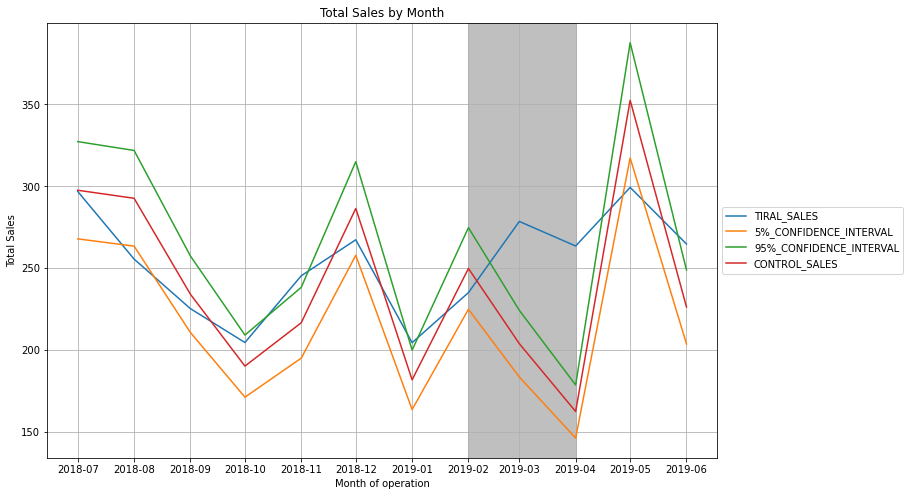

In [84]:
fig,ax = plt.subplots(figsize = (12,8))
plt.plot(combination_77)
plt.title("Total Sales by Month")
# show all the xaxis values
plt.xticks(combination_77.index.values)
# set x axies to year-month format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xlabel("Month of operation")
plt.ylabel("Total Sales")
ax.legend(labels = combination_77.columns,loc='center left', bbox_to_anchor=(1.0, 0.5))
# plt.legend(labels = (f'trial:{trial}', f'control:{control}','others'),loc='center left', bbox_to_anchor=(1.0, 0.5))
# plt.ylim((0,1400))
# highlight the trial period
plt.axvspan(*mdates.datestr2num(['2019-02-01', '2019-04-01']), color = 'grey', alpha = 0.5)
plt.grid()
plt.show()

In [31]:
trial_df = store_measures[store_measures['YEAR_MONTH']>="2019-02"]
trial_metrics_df = extract_metrics(trial_df)
trial_metrics_df.head()

MONTHLY_SALES  MONTHLY_CUST  MONTHLY_TRANS_PER_CUST  \
STORE_NBR YEAR_MONTH                                                        
1         2019-02             225.4            52                1.057692   
          2019-03             192.9            45                1.088889   
          2019-04             192.9            42                1.023810   
          2019-05             221.4            46                1.108696   
          2019-06             174.1            42                1.023810   

                      MONTHLY_CHIPS_PER_TRANS  AVG_PRICE_PER_UNIT  
STORE_NBR YEAR_MONTH                                               
1         2019-02                    1.250000            3.467692  
          2019-03                    1.288889            3.325862  
          2019-04                    1.357143            3.384211  
          2019-05                    1.434783            3.354545  
          2019-06                    1.261905            3.284906

In [35]:
# crtical value under 95% confidence 
# degree of freedom = n-1; there are 7 months in the pre-trial period (<201902)
# Hence 7-1 = 6 degrees of freedom
t.ppf(0.95, df=6)

1.9431802803927818

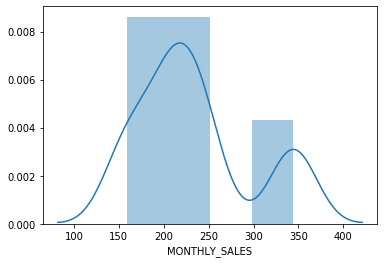

In [43]:
import seaborn as sns
# sns.distplot(trial_metrics_df.loc[77]['MONTHLY_SALES'])
sns.distplot(trial_metrics_df.loc[233]['MONTHLY_SALES'])